# 目標
- scikit-learnを使い機械学習の全体像を知る
- "Pythonではじめる機械学習" を写経する

# 環境
  anaconda 5.3 (Python 3.7, scikit-learn 0.19.2, jupiter notebookを使用)

# 用語集
誤解を恐れずドンドン定義する。
  
- 教師あり機械学習問題, クラス分類と回帰が相当する。
- 教師なし機械学習問題, 教師情報を用いない全ての問題...

- クラス分類, Classification, クラスラベルを予測すること。
- 回帰, Regression, 連続値を予測すること。
 
- クラスタリング, Clustering, ラベルのない情報を分類すること。
  
- 訓練データ, train data,
- テストデータ, test data,

- データセット, data set, データを持つ表
- データポイント, data point, サンプル, データを持つ表の1行
  


# 動作確認
なんかいっぱいライブラリを使います。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

data = {'Name':["John", "Annna", "Peter", "Linda"],
         'Location':["New York", "Paris", "Berli", "London"],
         'Age':[24,13,53,33]
       }
print(type(data))
print(data['Name'])

data_pandas=pd.DataFrame(data)
display(data_pandas)
print(type(data_pandas))

display(data_pandas[data_pandas.Age>30])
print(type(data_pandas[data_pandas.Age>30]))

data = {
    'Name':["NumPy", "SciPy", "matplotlib", "pandas", "mglearn"],
    'Description':[
        "多次元配列,線形代数,フーリエ変換,疑似乱数生成器などの数学関数を持つライブラリ,sklearnが使うデータ構造を持つ",
        "数学関数の集合,sklearnが機械学習アルゴリズムの実行時に使う",
        "グラフ描画ライブラリ",
        "データの変換、解析ライブラリ,csvファイルの読み込みに使う",
        "ユーティリティ"]
    }
data_pandas=pd.DataFrame(data)
display(data_pandas)

<class 'dict'>
['John', 'Annna', 'Peter', 'Linda']


,Name,Location,Age
0,John,New York,24
1,Annna,Paris,13
2,Peter,Berli,53
3,Linda,London,33


<class 'pandas.core.frame.DataFrame'>


,Name,Location,Age
2,Peter,Berli,53
3,Linda,London,33


<class 'pandas.core.frame.DataFrame'>


,Name,Description
0,NumPy,"多次元配列,線形代数,フーリエ変換,疑似乱数生成器などの数学関数を持つライブラリ,sklea..."
1,SciPy,"数学関数の集合,sklearnが機械学習アルゴリズムの実行時に使う"
2,matplotlib,グラフ描画ライブラリ
3,pandas,"データの変換、解析ライブラリ,csvファイルの読み込みに使う"
4,mglearn,ユーティリティ


# 有名らしいirisの例
とりあえずデータを使って、クラス分類します。

(誤) ~~クラス分類はおそらくクラスタリングと呼ばれています。~~

(正) クラス分類はClassificationです。クラスタリングはClusteringです。
  クラス分類は、あらかじめ設定したラベルに分類すること。教師あり学習。
  クラスタリングは、training dataを集合に分けること。教師なし学習。
  と今は理解。


In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()
print(type(iris_dataset))
print(iris_dataset.keys())
# target: 目的変数
# data: 説明変数
print(type(iris_dataset['data']))
print("data:{}" .format(iris_dataset['data'].shape), "target:{}" .format(iris_dataset['target'].shape))
print(iris_dataset['feature_names'])
print(iris_dataset['target_names'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
<class 'numpy.ndarray'>
data:(150, 4) target:(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


(112, 4) (38, 4) (112,) (38,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


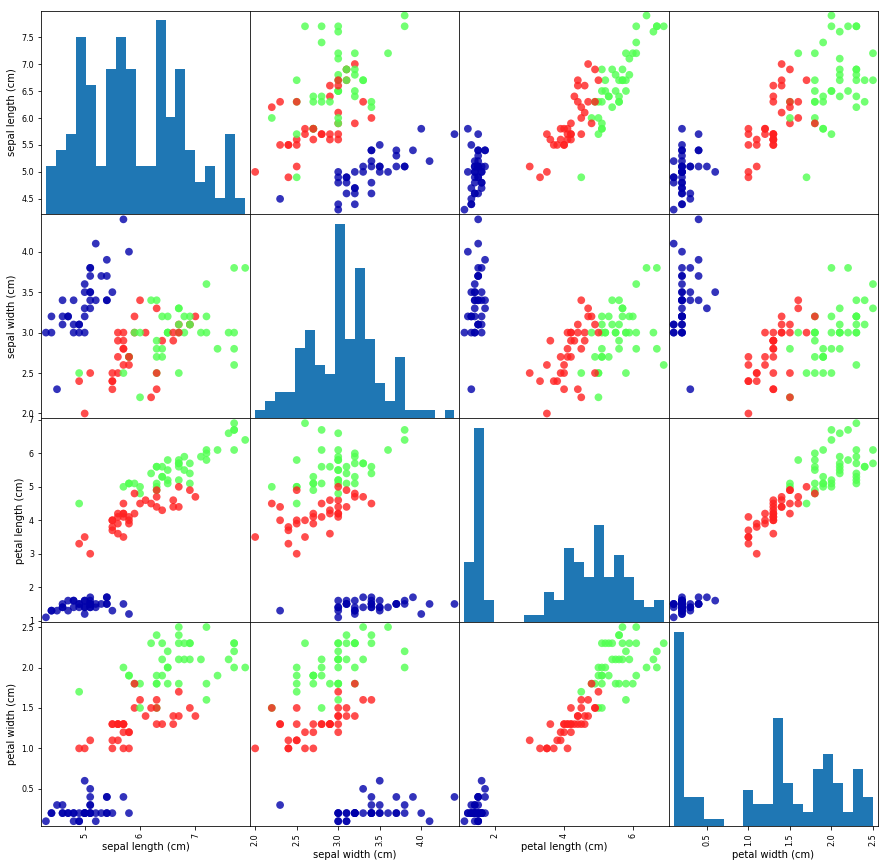

In [3]:
from sklearn.model_selection import train_test_split
# データセットを訓練セットとテストセットに分類
# trainは訓練セット(教師データ)、testがテストセット(評価データ)
X_train,X_test,y_train,y_test=train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
grr=pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15,15),
    marker='o',
    hist_kwds={'bins':20},
    s=60,
    alpha=.8,
    cmap=mglearn.cm3)
# scatter_matrixは何がなんだか...
# scatter plot: 散布図

# ためしに表で10件見てみる。petalは花びら。sepalはガクですよ。
display(iris_dataframe[:10])

# ここから機械学習 (k-最近傍法)

In [4]:
# モデルを作る
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [5]:
# 予測する
X_new=np.array([[5,2.9,1,0.2]])
print(X_new.shape)

prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

(1, 4)
[0]
['setosa']


In [6]:
print(X_test.shape)

# テストデータを使って評価する(p.23)
y_pred = knn.predict(X_test)
print(y_pred)

# yの予測値とyのテストデータを各々比較した平均(何%の確率で正しく予想できたか)
print(np.mean(y_pred == y_test))
# X_testの予測値を求めてy_testと比較してさらにスコアを求める(結果は上と同じ)
print(knn.score(X_test, y_test))

(38, 4)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
0.9736842105263158
0.9736842105263158


# 2章
## 用語
- 汎化, generalize
- 過剰適合, overfitting, 過学習
- 適合不足, underfitting, 

mglearnが持っている恣意的なデータセットの内容確認

/Users/takamasa/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


(26, 2)


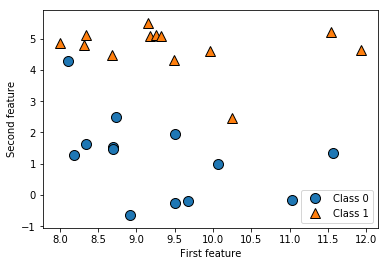

In [7]:
from sklearn.datasets import make_blobs

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(X.shape)

## 決定木
mglearnが持っている例の確認

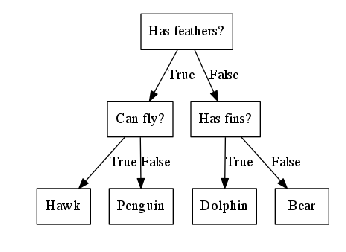

In [8]:
import graphviz
mglearn.plots.plot_animal_tree()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
data:(569, 30) target:(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


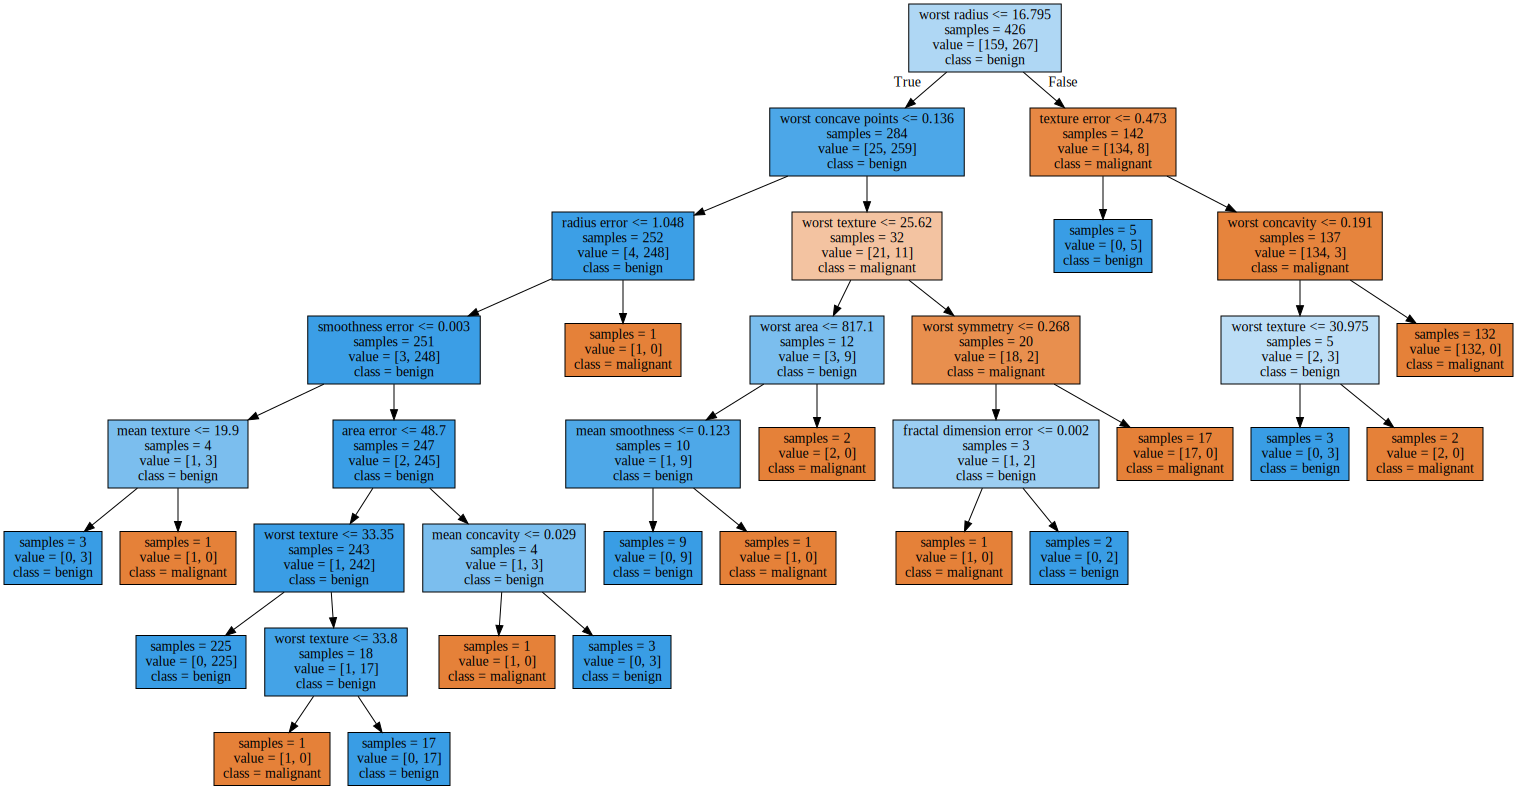

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

cancer = load_breast_cancer()
tree=DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42)

print(cancer.keys())
print("data:{}" .format(cancer['data'].shape), "target:{}" .format(cancer['target'].shape))
print(cancer['feature_names'])
print(cancer['target_names'])
# malignant: 悪性
# benign: 良性

tree.fit(X_train, y_train)
export_graphviz(
    tree,
    out_file="tree.dot",
    class_names=["malignant", "benign"],
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True)
with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- worst radius: 比較対象の特徴量
- samples: このノードに適合するデータの数(ルートは全データが該当する)サブノートのsamplesの和がノードのsamplesとおなじになる。
- value: クラスごとの数。
- class: リーフ以外は意味不明

[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


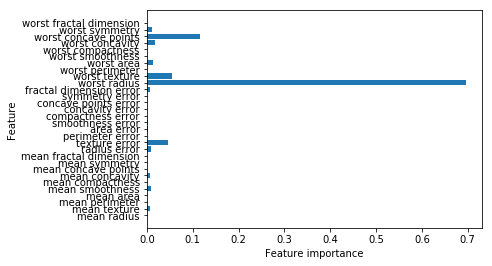

In [10]:
print(tree.feature_importances_) # 特徴量の重要度
# グラフ表示(なるほどわからん)
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

## ここから決定木を使った回帰の話

復習
- クラス分類: データを不連続なグループに分類すること。データのクラスラベルを予測すること。
- 回帰: 連続値を予測すること。

主な疑問
- 木構造で値を予測するとはこれいかに？

Index(['Unnamed: 0', 'date', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
(333, 3)


,Unnamed: 0,date,price
0,0,1957.00,411041792.0
1,1,1959.00,67947725.0
2,2,1960.00,5242880.0
3,3,1965.00,2642412.0
4,4,1970.00,734003.0
5,5,1973.00,399360.0
6,6,1974.00,314573.0
7,7,1975.00,421888.0
8,8,1975.08,180224.0
9,9,1975.25,67584.0


Text(0,0.5,'Price in $/Mbyte')

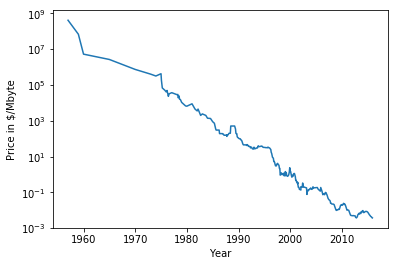

In [11]:
# とりあえずデータを見る
import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_prices.keys())
print(type(ram_prices))
print(ram_prices.shape)
display(ram_prices[:10])

plt.semilogy(ram_prices.date, ram_prices.price) # y軸を対数表現にする。(何かしら) log y の略と思われるがわからん。
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

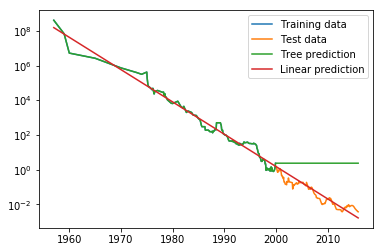

In [12]:
# 決定木と線形回帰で結果を比較

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = data_train.date[:, np.newaxis] # X_train: 学習データの説明変数, 2次元配列に変更
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# グラフ表示
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

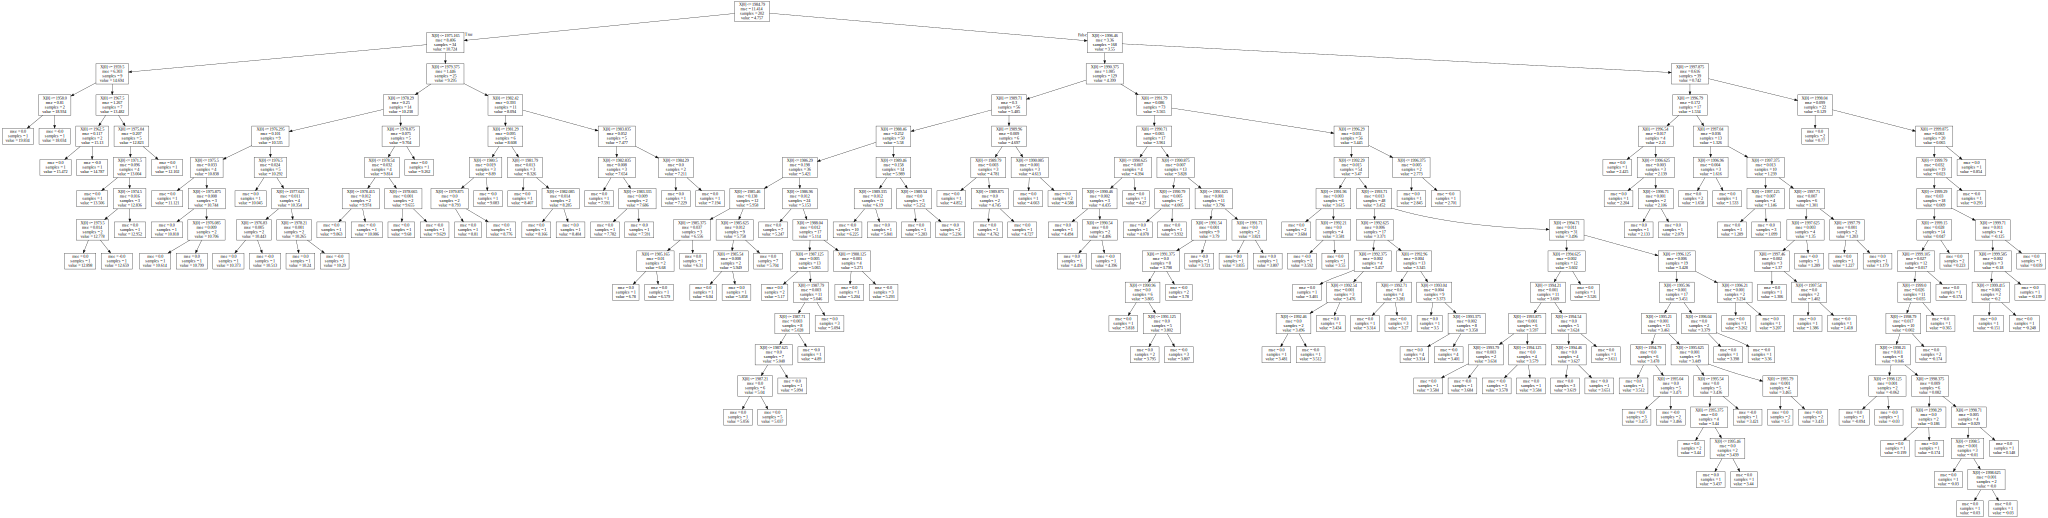

In [13]:
# 決定木による回帰の木を見てみる
export_graphviz(
    tree,
    out_file="pred_tree.dot")
with open("pred_tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- X[n]: 日付、今回の唯一の説明変数
- mse: 平均二乗誤差 (MSE, Mean Squared Error)
- samples: ノードを通るデータ点数
- value: ノードを通るデータの平均値

## 評価
- 決定木はTraining dataを完全に予測できる。(この例では枝切りしてないので過学習してる)
- 決定木はTraining dataの範囲外(2000年以降)に対して予測できない。
- 線形回帰はTrainig dataの予測に誤差がある。
- 線形回帰はTrainig dataの範囲外を予測できる。

## 結論
決定木はクラス分類、回帰に関わらず過学習しやすく、汎化性能が低い特性がある。
対策として事前枝刈りや事後枝刈りがあるが、それらだけでは十分な対策とならない。
そこで、アンサンブルを用いる。

# ランダムフォレスト
複数の決定木を使ってその平均値を使って予測する。
決定木を作るときに乱数を使う。
1. データセットから決定木を構成するデータセットを選択するときに乱数を使う(ブートストラップサンプリング)
1. 決定木のノードで評価する特徴量を選択するときに乱数を使う(個々のノードで評価する特徴量の数はパラメータで指定する。どの特徴量を選択するかをランダムに決める)




/Users/takamasa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


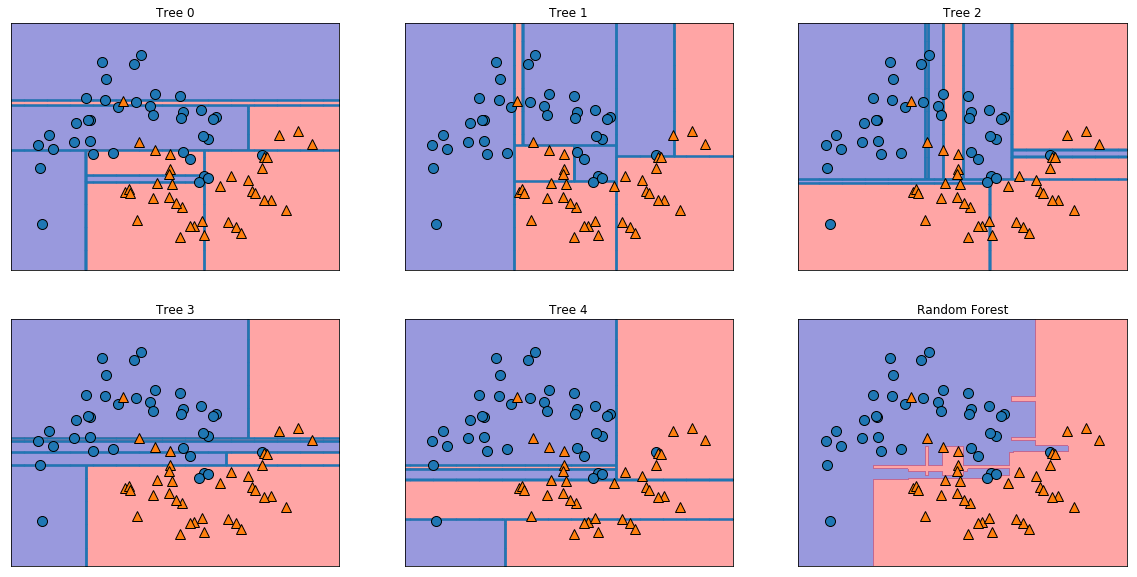

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(
    n_estimators=5,  #  作る木の数
    random_state=2)  #  乱数のシード
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):  # Pythonヤダ...
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(
    forest, 
    X_train, 
    fill=True, 
    ax=axes[-1, -1],
    alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Tree 0-4 の平均をとると "Random Forest" の木が作れるようだ。

## 評価
★決定木の回帰ではなめらかな線形モデルを作ることはないんだろうね★


## 結論

## 勾配Boosting回帰木
今回は省略。

# 一旦戻って線形回帰の復習
## 線形モデルによる回帰
- 線形回帰(通常最小二乗法)
- リッジ回帰(各次元の係数を制限することで過剰適合を防ぐアイデア)
- Lasso
  

## このあと
写経は下記おしまいにする。
- 戻って p.56 クラス分類のための線形モデル (SVC)
- p.90 カーネル法を用いたサポートベクタマシン
- p.102 ニューラルネットワーク(ディープラーニング)
その後、なんか使えそうなデータを使って試したい。

## クラス分類のための線形モデル
1. ロジスティック回帰 (logistic regression)
1. 線形サポートベクタマシン (linear support vector machines: SVM)

### 正則化
上記いずれのアルゴリズムもデフォルトでL2正則化を行います。
正則化は過学習を防ぐための項です。詳細は学習しておりません。
scikit-learnには各アルゴリズムにパラメータを渡し、その値によって学習データに対する適合具合を調整します。
* L1正則化: 一部の特徴量が重要な場合に使うと効果的。解釈しやすいモデルを作ることができる。
* L2正則化: 大多数はこちらを使うことをこの書籍は推奨している。

## カーネル法を用いたサポートベクタマシン
TBD

## ニューラルネットワーク

